In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Linear Regression

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
df = load_diabetes()

In [6]:
# df

In [7]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names

In [9]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
dataset['DeseaseProgression'] = df.target

In [11]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DeseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [12]:
# Dividing the datasaet into independent and dependent features
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [13]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [14]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: DeseaseProgression, dtype: float64

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def scatter_plot(y_test, y_pred):
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect line
    plt.grid(True)
    plt.show()

def residual_plot(y_test, y_pred):
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title("Residual Plot")
    plt.grid(True)
    plt.show()


def distribution_plot(y_test, y_pred):
    errors = y_test - y_pred
    sns.histplot(errors, kde=True)
    plt.xlabel("Prediction Error")
    plt.title("Distribution of Prediction Errors")
    plt.grid(True)
    plt.show()


def regression_metrics(y_test, y_pred):
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [19]:
lin_reg = LinearRegression()
mse = cross_val_score(lin_reg,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-2993.081310469331


In [20]:
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)

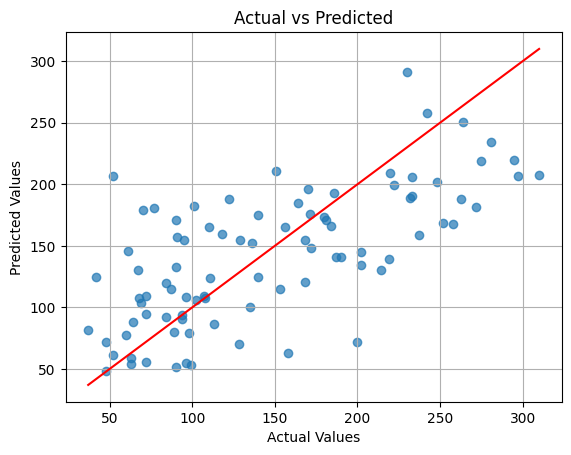

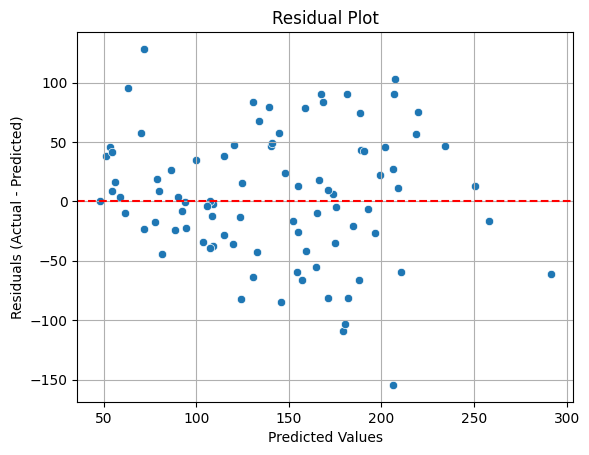

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


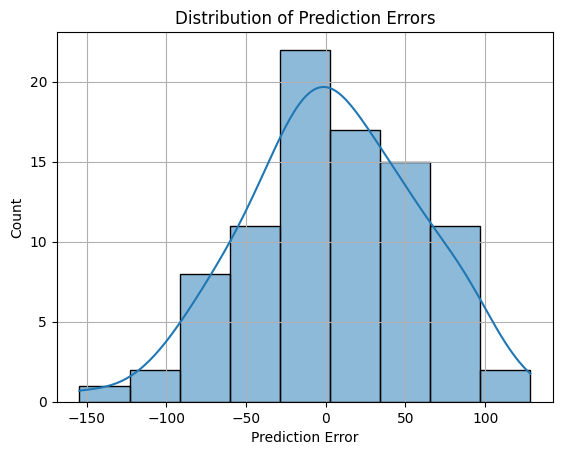

MAE: 42.794094679599944
MSE: 2900.193628493482
RMSE: 53.85344583676593
R² Score: 0.4526027629719195


In [21]:
scatter_plot(y_test, y_pred)
residual_plot(y_test, y_pred)
distribution_plot(y_test, y_pred)
regression_metrics(y_test, y_pred)

In [22]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-1,1,2,3,5,10,20,50]}

# Ridge Regreaaion

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001)
ridge_regressor = GridSearchCV(ridge, params,scoring='neg_mean_squared_error')
ridge_regressor.fit(x,y)
print(ridge_regressor.best_params_,ridge_regressor.best_score_)

{'alpha': 0.001} -2993.0661546538695


In [24]:
ridge.fit(x_train,y_train)
ridge_y_pred = ridge.predict(x_test)

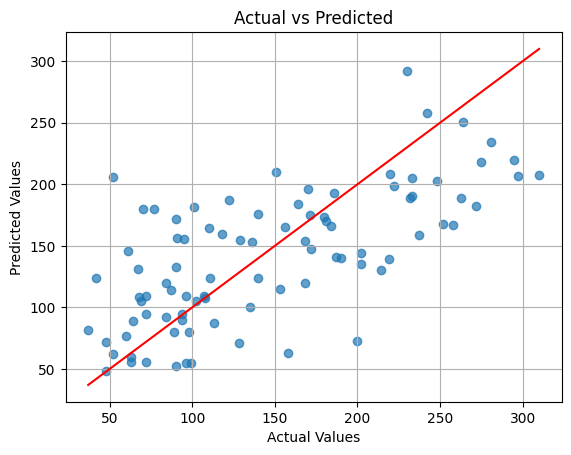

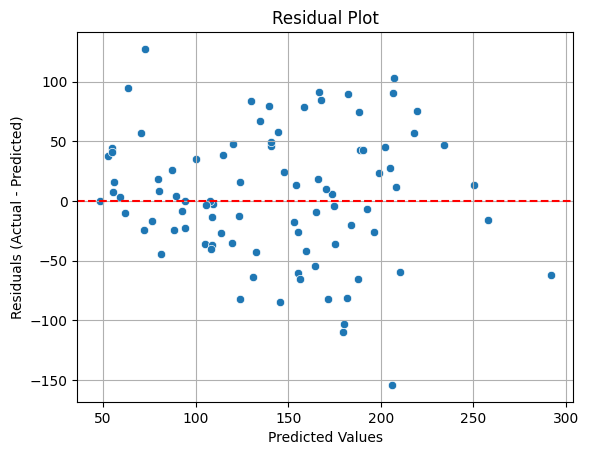

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


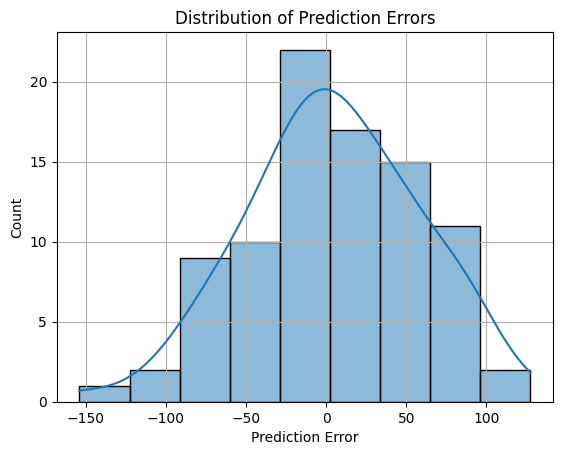

MAE: 42.8030817864112
MSE: 2895.8212380056066
RMSE: 53.812835253363176
R² Score: 0.4534280301019331


In [25]:
scatter_plot(y_test, ridge_y_pred)
residual_plot(y_test, ridge_y_pred)
distribution_plot(y_test, ridge_y_pred)
regression_metrics(y_test, ridge_y_pred)

# Lasso Regression

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1e-8)

lasso_regressor = GridSearchCV(lasso, params,scoring='neg_mean_squared_error')
lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_,lasso_regressor.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.122e+05, tolerance: 2.153e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.004e+05, tolerance: 2.044e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.929e+05, tolerance: 2.070e

{'alpha': 1e-08} -2993.0813092745934


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.642e+03, tolerance: 2.621e+02
  model = cd_fast.enet_coordinate_descent(


In [27]:
lasso.fit(x_train,y_train)
lasso_y_pred = lasso.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.972e+02, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


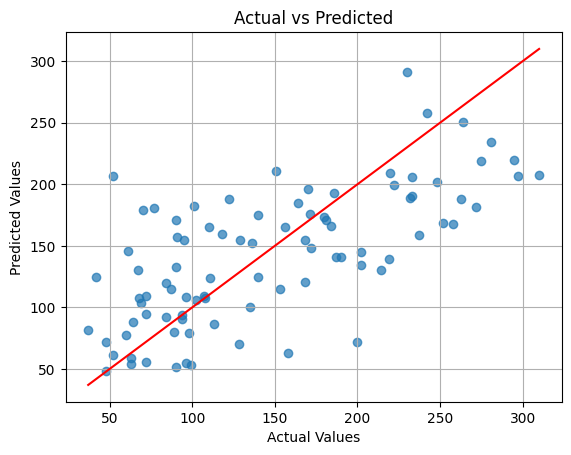

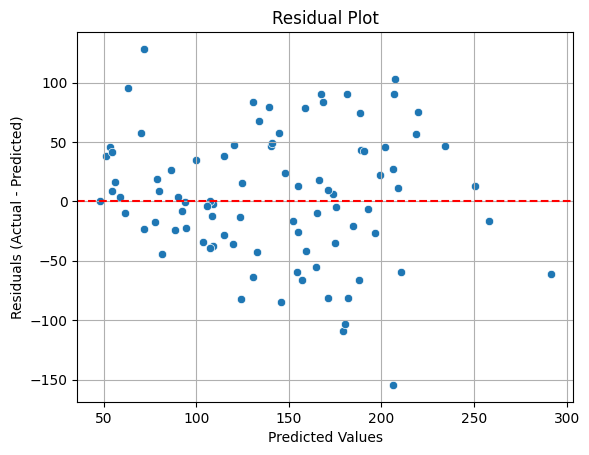

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


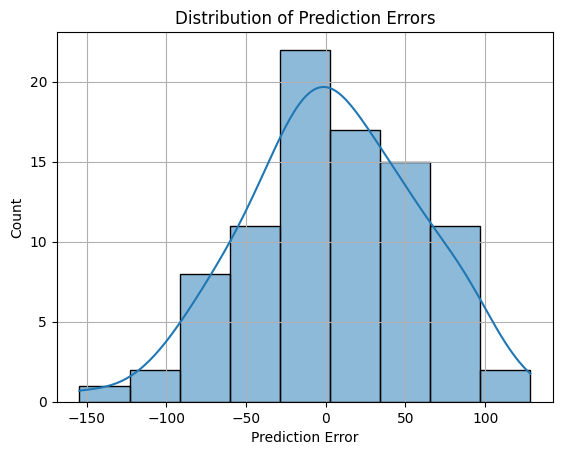

MAE: 42.79409467271155
MSE: 2900.1935891964404
RMSE: 53.85344547191424
R² Score: 0.45260277038904206


In [28]:
scatter_plot(y_test, lasso_y_pred)
residual_plot(y_test, lasso_y_pred)
distribution_plot(y_test, lasso_y_pred)
regression_metrics(y_test, lasso_y_pred)